In [1]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [2]:
# Read the first dataset
df_white = pd.read_excel(r'C:\Users\tobia\OneDrive\Skrivebord\winequality-white.xlsx',header=1)  # Assuming header is in the second row


In [3]:
# Read the second dataset
df_red = pd.read_excel(r'C:\Users\tobia\OneDrive\Skrivebord\winequality-red.xlsx', header=1)  # Assuming header is in the second row


In [4]:
# Add one-hot encoded columns for red and white wine in the red wine DataFrame
df_red['is_red'] = True
df_red['is_white'] = False

# Add one-hot encoded columns for red and white wine in the white wine DataFrame
df_white['is_red'] = False
df_white['is_white'] = True

In [5]:
# Combine the two datasets
df = pd.concat([df_white, df_red], ignore_index=True)

In [6]:
df.sample(61)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red,is_white
3213,7.5,0.180,0.45,4.6,0.041,67.0,158.0,0.99270,3.01,0.38,10.600000,6,False,True
3281,6.5,0.320,0.30,2.3,0.051,20.0,127.0,0.98964,3.13,0.52,12.800000,6,False,True
5951,8.3,0.330,0.42,2.3,0.070,9.0,20.0,0.99426,3.38,0.77,12.700000,7,True,False
4879,6.6,0.340,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,False,True
3436,6.9,0.240,0.23,7.1,0.041,20.0,97.0,0.99246,3.10,0.85,11.400000,6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,8.0,0.420,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.300000,7,False,True
5114,8.7,0.625,0.16,2.0,0.101,13.0,49.0,0.99620,3.14,0.57,11.000000,5,True,False
598,5.9,0.270,0.29,11.4,0.036,31.0,115.0,0.99490,3.35,0.48,10.500000,8,False,True
5818,9.6,0.410,0.37,2.3,0.091,10.0,23.0,0.99786,3.24,0.56,10.500000,5,True,False


In [102]:
df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
is_red                    0.246114
is_white                  0.753886
dtype: float64

In [103]:
df.std()

fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
is_red                   0.430779
is_white                 0.430779
dtype: float64

In [104]:
df.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
is_red                  6497
is_white                6497
dtype: int64

In [105]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
is_white                0
dtype: int64

In [106]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
is_red                     bool
is_white                   bool
dtype: object

<Figure size 1000x600 with 0 Axes>

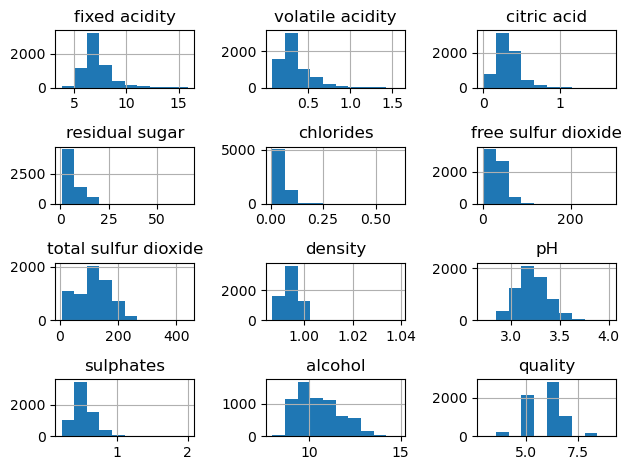

In [107]:
plt.figure(figsize=(10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

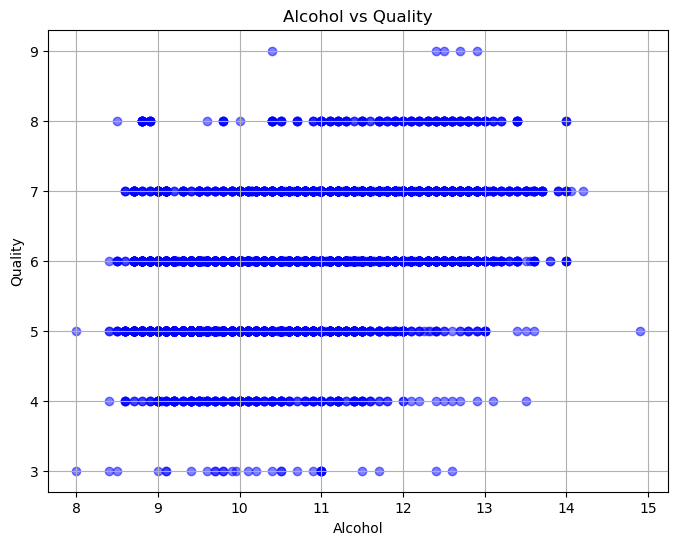

In [108]:
# Create scatter plot for alcohol vs quality
plt.figure(figsize=(8, 6))
plt.scatter(df['alcohol'], df['quality'], color='blue', alpha=0.5)  # 'alcohol' on x-axis, 'quality' on y-axis

# Add labels and title
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs Quality')

# Show plot
plt.grid(True)
plt.show()


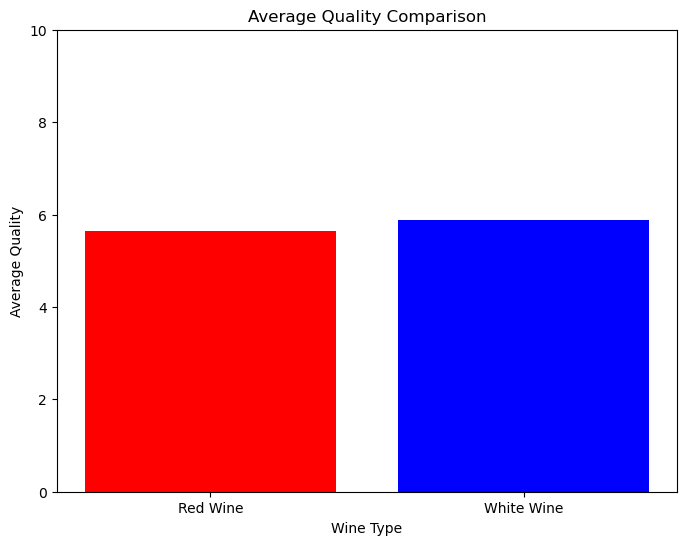

In [124]:
import matplotlib.pyplot as plt

# Calculate mean quality for red wine
red_mean_quality = df[df['is_red']]['quality'].mean()

# Calculate mean quality for white wine
white_mean_quality = df[df['is_white']]['quality'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Red Wine', 'White Wine'], [red_mean_quality, white_mean_quality], color=['red', 'blue'])
plt.title('Average Quality Comparison')
plt.xlabel('Wine Type')
plt.ylabel('Average Quality')
plt.ylim(0, 10)  # Set the y-axis limit to ensure both plots have the same scale
plt.show()


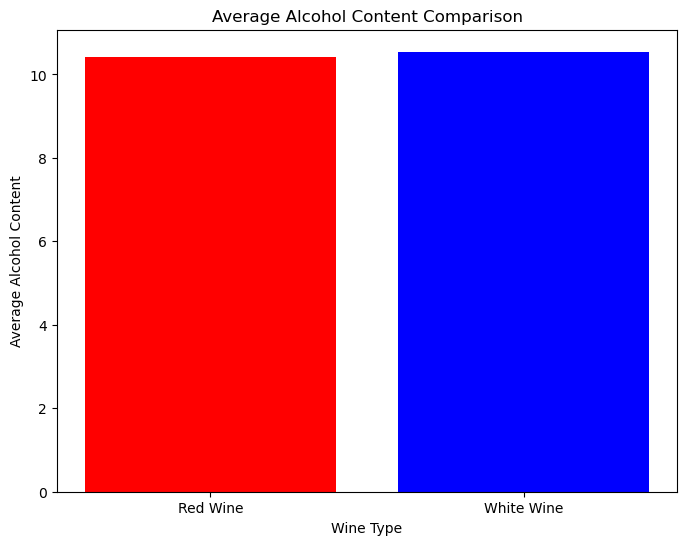

In [123]:
import matplotlib.pyplot as plt

# Calculate mean alcohol content for red wine
red_mean_alcohol = df[df['is_red']]['alcohol'].mean()

# Calculate mean alcohol content for white wine
white_mean_alcohol = df[df['is_white']]['alcohol'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Red Wine', 'White Wine'], [red_mean_alcohol, white_mean_alcohol], color=['red', 'blue'])
plt.title('Average Alcohol Content Comparison')
plt.xlabel('Wine Type')
plt.ylabel('Average Alcohol Content')
plt.show()


In [120]:
# Calculate mean quality for red wine
red_mean_quality = df[df['is_red']]['quality'].mean()

# Calculate mean quality for white wine
white_mean_quality = df[df['is_white']]['quality'].mean()

# Compare mean qualities
if red_mean_quality > white_mean_quality:
    print("Red wine has a higher average quality.")
elif red_mean_quality < white_mean_quality:
    print("White wine has a higher average quality.")
else:
    print("Red and white wines have the same average quality.")


White wine has a higher average quality.


In [111]:
""""
a. what exactly is shown on the diagrams?
Histograms: The histograms show the distribution of each numeric variable in the dataset. Each histogram represents the frequency of occurrence of values within specific intervals (bins) for that variable.
Scatter plot: The scatter plot shows the relationship between 'Alcohol' content and 'Quality' of wine. Each point in the plot represents a wine sample, with its x-coordinate indicating alcohol content and y-coordinate indicating quality.
Destribution plot: The density plot shows the distribution of 'Alcohol' content in the dataset. It represents the probability density function of the 'Alcohol' variable.

b. after seeing it, can you tell which type of wine has higher average quality?
yes white has a higer avarage quality 

c. which type of wine has higher average level of alcohol?
white has an higer avarage level of alchol

d. which one has higher average quantity of residual sugar? 
white has the higer avarage level of residual sugar
"""

'"\na. what exactly is shown on the diagrams?\nHistograms: The histograms show the distribution of each numeric variable in the dataset. Each histogram represents the frequency of occurrence of values within specific intervals (bins) for that variable.\nScatter plot: The scatter plot shows the relationship between \'Alcohol\' content and \'Quality\' of wine. Each point in the plot represents a wine sample, with its x-coordinate indicating alcohol content and y-coordinate indicating quality.\nDestribution plot: The density plot shows the distribution of \'Alcohol\' content in the dataset. It represents the probability density function of the \'Alcohol\' variable.\n\nb. after seeing it, can you tell which type of wine has higher average quality?\nc. which type of wine has higher average level of alcohol?\nd. which one has higher average quantity of residual sugar? \n'

In [112]:
# Binning the data into 5 subsets based on pH
df['pH_bins_5'] = pd.cut(df['pH'], bins=5)

# Calculate the density of each subset
density_5 = df['pH_bins_5'].value_counts(normalize=True)

# Identify the subset with the highest density
highest_density_subset_5 = density_5.idxmax()
highest_density_5 = density_5.max()

print("Subset with the highest density (5 bins):", highest_density_subset_5)
print("Density of the highest density subset (5 bins):", highest_density_5)

Subset with the highest density (5 bins): (2.978, 3.236]
Density of the highest density subset (5 bins): 0.514699091888564


In [7]:
# Binning the data into 10 subsets based on pH
df['pH_bins_10'] = pd.cut(df['pH'], bins=10)

# Calculate the density of each subset
density_10 = df['pH_bins_10'].value_counts(normalize=True)

# Identify the subset with the highest density
highest_density_subset_10 = density_10.idxmax()
highest_density_10 = density_10.max()

print("Subset with the highest density (10 bins):", highest_density_subset_10)
print("Density of the highest density subset (10 bins):", highest_density_10)

Subset with the highest density (10 bins): (3.107, 3.236]
Density of the highest density subset (10 bins): 0.324919193473911


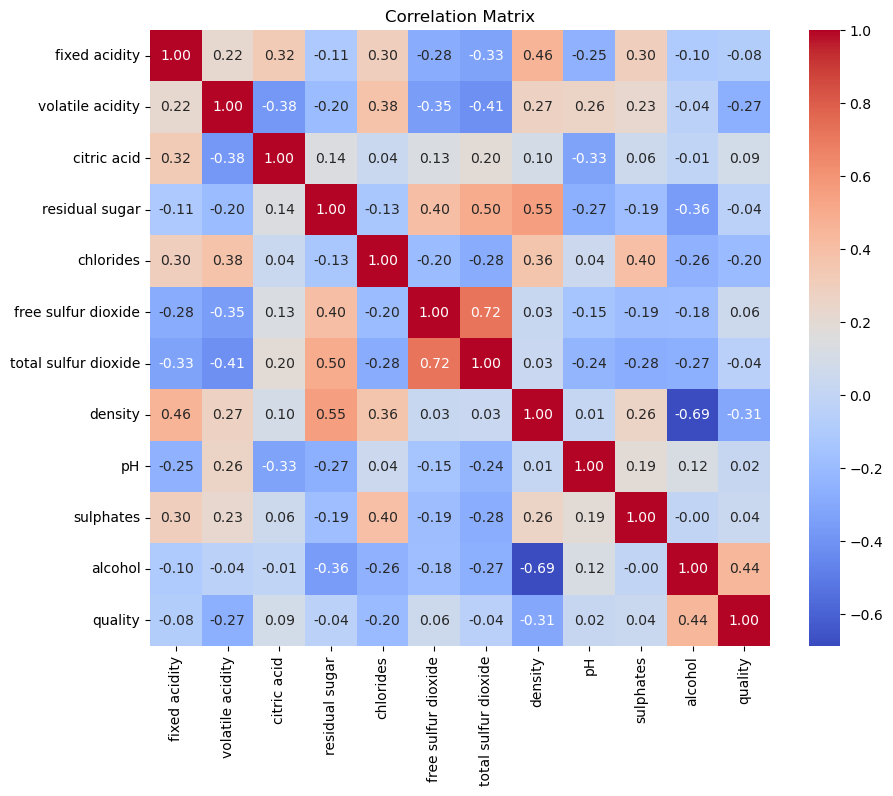

In [9]:
# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])


df_cleaned = numeric_df.dropna()
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Identify outliers in 'residual sugar'
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['residual sugar'] < lower_bound) | (df['residual sugar'] > upper_bound)]

# Print rows with outliers
print("Rows with outliers in 'residual sugar':")
print(outliers)

# Remove rows with outliers
df = df[(df['residual sugar'] >= lower_bound) & (df['residual sugar'] <= upper_bound)]

# Confirmation message
print("Outliers removed successfully.")


Rows with outliers in 'residual sugar':
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
218             5.7              0.28         0.24           17.50      0.044   
694             7.6              0.29         0.58           17.50      0.041   
967             6.8              0.22         0.35           17.50      0.039   
972             6.8              0.22         0.35           17.50      0.039   
998             8.0              0.24         0.30           17.45      0.056   
1083            7.4              0.20         0.37           16.95      0.048   
1088            7.4              0.20         0.37           16.95      0.048   
1090            8.3              0.21         0.58           17.10      0.049   
1156            7.8              0.30         0.29           16.85      0.054   
1157            7.8              0.30         0.29           16.85      0.054   
1159            7.8              0.30         0.29           16.85   

In [12]:
# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations
correlations = numeric_df.corr()['quality'].drop('quality')

# Find attribute with the lowest correlation
attribute_to_remove = correlations.idxmin()

# Remove attribute with the lowest correlation
df.drop(columns=attribute_to_remove, inplace=True)


print("The attribute '{}' wich has the lowest correlation to wine quality has been removed.".format(attribute_to_remove))


The attribute 'density' wich has the lowest correlation to wine quality has been removed.


In [13]:
from sklearn.decomposition import PCA

# Select numeric columns only
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize PCA
pca = PCA()

# Fit PCA
pca.fit(df[numeric_columns].drop(columns=['quality']))  # Exclude target variable 'quality'

# Determine the optimal number of components
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()
optimal_num_components = (explained_variance_ratio_cumulative < 0.95).sum() + 1  # Keep components explaining at least 95% of variance

# Confirmation message
print(f"The optimal number of components is: {optimal_num_components}")


The optimal number of components is: 1


In [14]:
# Print ten random rows
print("Ten random rows from the final dataset:")
print(df.sample(10))


Ten random rows from the final dataset:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6347            7.2              0.38         0.31             2.0      0.056   
806             6.4              0.31         0.26            13.2      0.046   
1169            7.5              0.14         0.34             1.3      0.055   
860             8.1              0.27         0.35             1.7      0.030   
757             6.8              0.22         0.37            15.2      0.051   
2158            7.4              0.18         0.27             1.3      0.048   
136             8.2              0.23         0.40             1.2      0.027   
2721            8.2              0.37         0.64            13.9      0.043   
4340            7.3              0.19         0.27            13.9      0.057   
2030            9.5              0.42         0.41             2.3      0.034   

      free sulfur dioxide  total sulfur dioxide    pH  sulphates  al

In [119]:
df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
is_red                      bool
is_white                    bool
pH_bins_5               category
pH_bins_10              category
dtype: object